In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

## Data diamonds

In [32]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat'>

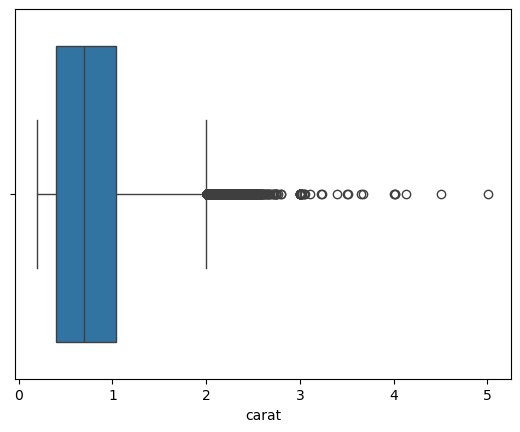

In [33]:
sns.boxplot(df, x='carat')

La variable carat contient des valeurs abberantes que nous allons essayer d'enléver

### Fonction IQR

In [34]:
def IRQ_outliers_detection(df, feature, threshold=1.5):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - threshold * IQR
    upper_bound = q3 + threshold * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outliers = IRQ_outliers_detection(df,'carat',1.5)

outliers.shape

(1889, 10)

In [35]:
df.shape

(53940, 10)

#### Modèle de détection des anormalies: 
- Local Oultliers Factor LoF
- Isolation Forest

In [36]:
np.random.seed(0)
n = 100
X = np.random.randn(n).reshape(-1,1)
y = np.random.randn(n).reshape(-1,1) + 3 * X - 2

X = np.concatenate((X, [[2]]), axis=0)
y = np.concatenate((y, [[-8]]), axis=0)

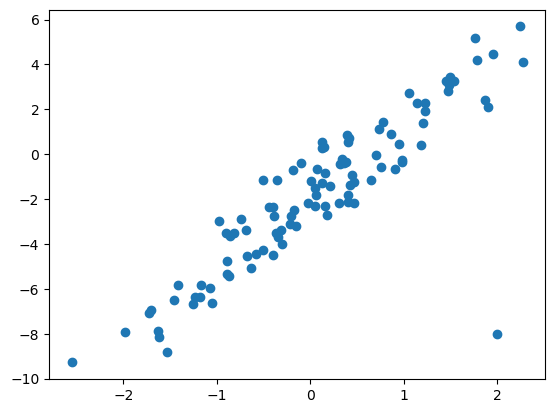

In [37]:
plt.scatter(X,y)

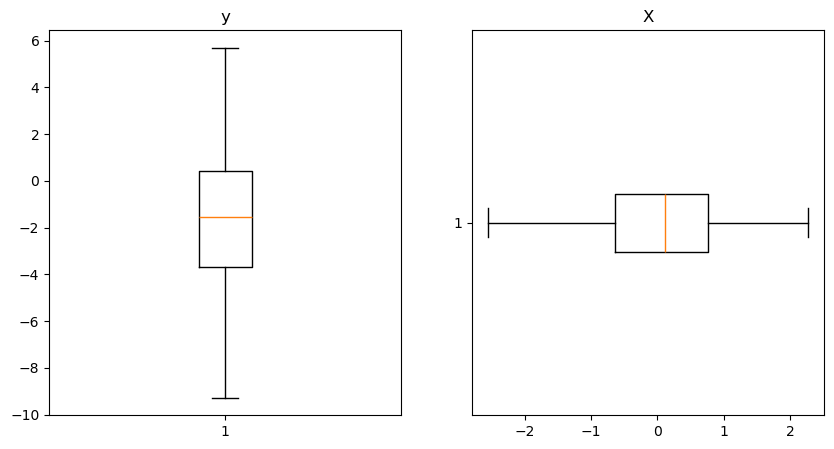

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(y)
ax[0].set_title('y')
ax[1].boxplot(X, vert=False)
ax[1].set_title('X')
plt.show()

In [39]:
data = np.concatenate((X,y), axis=1)

In [40]:
detection_model = LocalOutlierFactor(contamination=0.01, n_neighbors=5)
outliers = detection_model.fit_predict(data)

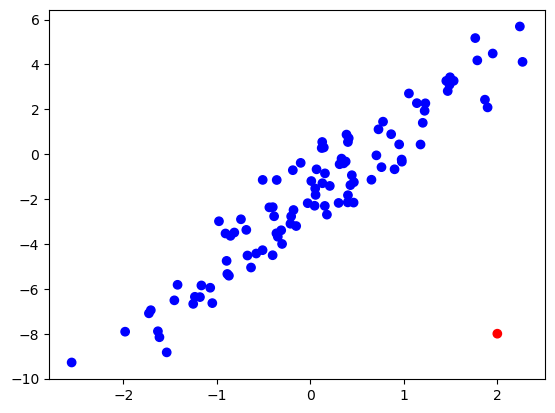

In [42]:

plt.scatter(X, y, c = outliers, cmap='bwr_r')
plt.show()